# EDA, Pandas Plots & Multi-Indexed Tables

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

[Los Angeles City Webpage Datasets](https://catalog.data.gov/harvest/416d43ac-4ad3-4755-9c96-e9abbd668e19?page=2) | [Today's data](https://www.kaggle.com/rohitsahoo/sales-forecasting)

In [1]:
import pandas as pd
import json,os
import numpy as np
import matplotlib as plt

In [78]:

def os_any_dir_search(file):
    u=[]
    for p,n,f in os.walk(os.getcwd()):
        
        for a in f:
            a = str(a)
            if a.endswith(file): # can be (.csv) or a file like I did and search 
#                 print(a)
#                 print(p)
                t=pd.read_csv(p+'/'+file)
                u.append(p+'/'+a)
    return t,u

# os_any_dir_search('archive.zip')

In [ ]:
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [80]:
sales_dta=os_any_dir_search('archive.zip')[0]
sales_dta.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


,Sales
Ship Mode,
Standard Class,1.340831e+06
Second Class,4.499142e+05
First Class,3.455723e+05
Same Day,1.252190e+05


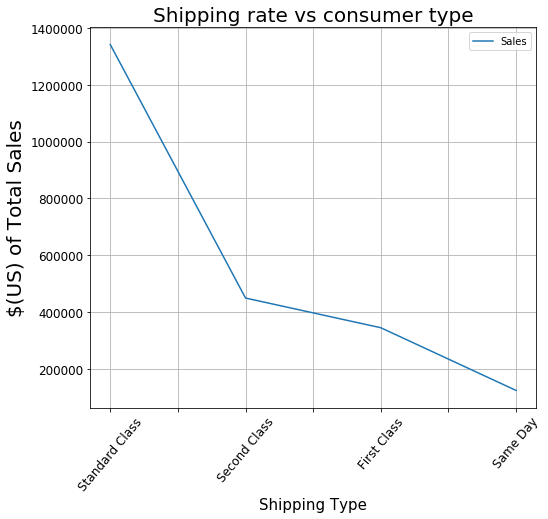

In [239]:
# plt.figure()
# plt.xticks(rotation=45)
ax_=sales_dta.loc[:,['Ship Mode','Sales']].groupby('Ship Mode').sum().\
sort_values('Sales',ascending=False).plot(fontsize=12,figsize=(8,7),rot=50)

ax_.set_xlabel("Shipping Type",fontsize=15)
ax_.grid()
ax_.set_ylabel("$(US) of Total Sales",fontsize=20)
ax_.set_title('Shipping rate vs consumer type',fontsize=20) 

sales_dta.loc[:,['Ship Mode','Sales']].groupby('Ship Mode').sum().sort_values('Sales',
                                                    ascending=False)


,sum,count
Ship Mode,,
Standard Class,1.340831e+06,5859
Second Class,4.499142e+05,1902
First Class,3.455723e+05,1501
Same Day,1.252190e+05,538


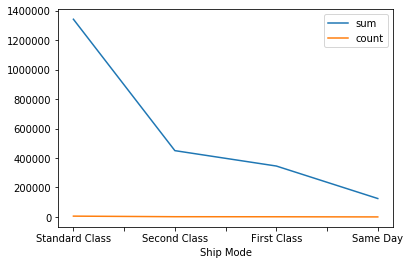

In [176]:
sales_dta.loc[:,['Ship Mode','Sales']].\
groupby('Ship Mode')['Sales'].agg(['sum','count']).sort_values('sum',
                                                    ascending=False).plot()

sales_dta.loc[:,['Ship Mode','Sales']].\
groupby('Ship Mode')['Sales'].agg(['sum','count']).sort_values('sum',
                                                    ascending=False)

In [ ]:
# get index and column names and info from above

array([<matplotlib.axes._subplots.AxesSubplot object at 0x15a0caeb8>,
      dtype=object)

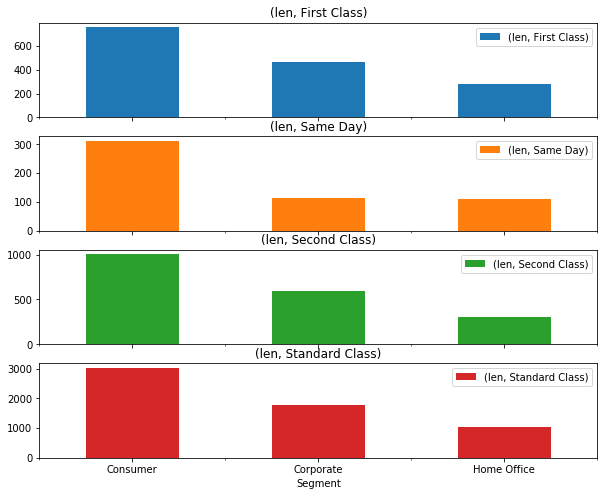

In [221]:
# plt.figure(figsize=(8,8))
sales_dta.groupby(['Segment', 'Ship Mode']).Segment.agg([len]).unstack().\
plot(kind='bar', subplots=True,figsize=(10,8),rot=0)
# sort_values(['len'],ascending=False)

Text(0.5, 1.0, 'Shipping rate vs consumer type')

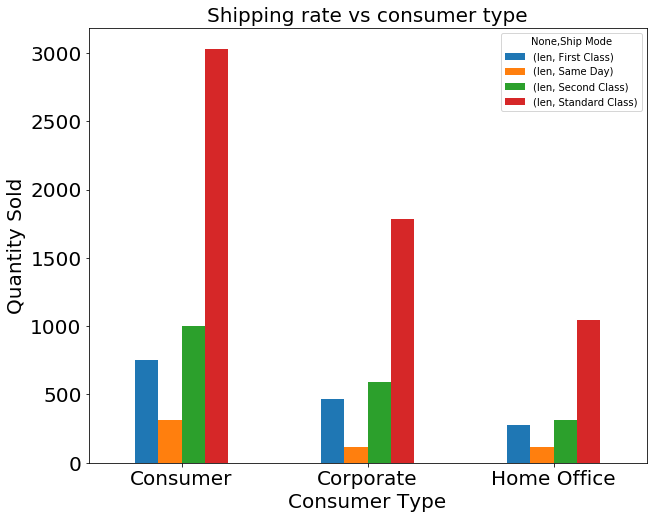

In [217]:
ax=sales_dta.groupby(['Segment', 'Ship Mode']).Segment.agg([len]).unstack().\
plot.bar(rot=0,figsize=(10,8),fontsize=20)
# ax.grid()
ax.set_xlabel("Consumer Type",fontsize=20)
ax.set_ylabel("Quantity Sold",fontsize=20)
ax.set_title('Shipping rate vs consumer type',fontsize=20)

Text(0.5, 1.0, 'Item Type Sold')

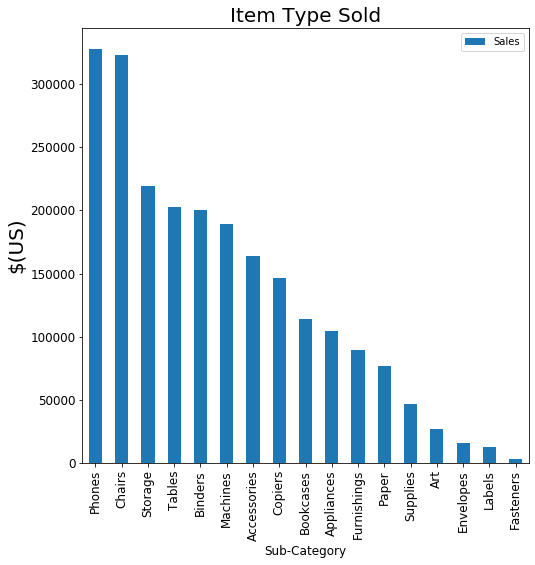

In [238]:
a_=sales_dta[['Sub-Category','Sales']].groupby('Sub-Category').sum().\
sort_values('Sales',ascending=False).plot(kind='bar',figsize=(8,8),fontsize=12)


a_.set_xlabel('Sub-Category',fontsize=12)
# a_.grid()
a_.set_ylabel("$(US)",fontsize=20)
a_.set_title('Item Type Sold',fontsize=20) 


# `Crosstab`

+ we don't need a dataframe, we can use arrays/lists instead
+ can normalize your data

In [271]:
import numpy as np

customer_name=np.array(sales_dta['Customer Name'].to_list())
sales_tots=np.array(sales_dta['Sales'].to_list())
sub_category=np.array(sales_dta['Sub-Category'].to_list())

sub_category
pd.crosstab(customer_name,sub_category)
# .plot.bar(stacked=True)
# pd.crosstab(sales_tots,sub_category,normalize='index')

col_0,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
row_0,,,,,,,,,,,,,,,,,
Aaron Bergman,0,0,1,0,1,1,0,0,0,0,0,0,0,1,2,0,0
Aaron Hawkins,1,0,1,2,0,1,0,1,0,1,1,0,1,1,1,0,0
Aaron Smayling,0,0,0,3,1,0,0,0,0,0,0,2,2,0,1,0,1
Adam Bellavance,3,1,0,3,0,1,0,0,0,1,0,0,7,0,0,1,1
Adam Hart,1,1,2,2,0,1,0,0,1,3,1,0,4,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xylona Preis,3,2,4,4,0,0,0,1,1,4,0,0,7,0,2,0,0
Yana Sorensen,1,0,1,2,0,1,0,1,0,1,0,0,0,0,4,0,1
Yoseph Carroll,0,0,1,0,0,0,1,0,0,1,0,0,2,1,2,0,0


In [272]:
sales_dta.loc[:,['Customer Name','Sub-Category','Sales']].\
groupby(['Customer Name','Sub-Category']).count()

Sales
Customer Name      Sub-Category       
Aaron Bergman      Art               1
                   Bookcases         1
                   Chairs            1
                   Phones            1
                   Storage           2
...                                ...
Zuschuss Donatelli Art               1
                   Binders           1
                   Furnishings       2
                   Paper             1
                   Phones            3

[5942 rows x 1 columns]

In [309]:
pd.crosstab(index=sales_dta['Customer Name'], columns=sales_dta['Sub-Category'], 
    values=sales_dta['Sales'], margins=True, aggfunc='sum')[:5]

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,All
Customer Name,,,,,,,,,,,,,,,,,,
Aaron Bergman,NaN,NaN,17.940,NaN,341.960,48.712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.98,255.564,NaN,NaN,886.156
Aaron Hawkins,34.77,NaN,18.704,59.320,NaN,279.456,NaN,247.84,NaN,86.45,18.90,NaN,8.000,668.16,323.100,NaN,NaN,1744.700
Aaron Smayling,NaN,NaN,NaN,132.588,477.666,NaN,NaN,NaN,NaN,NaN,NaN,2135.682,102.068,NaN,31.400,NaN,171.288,3050.692
Adam Bellavance,195.74,160.32,NaN,4404.216,NaN,449.568,NaN,NaN,NaN,127.88,NaN,NaN,353.106,NaN,NaN,27.930,2036.860,7755.620
Adam Hart,165.60,2.22,15.848,850.163,NaN,314.352,NaN,NaN,17.9,442.13,5.22,NaN,135.648,NaN,NaN,422.616,878.640,3250.337


In [332]:
FL=sales_dta[sales_dta['State']=='Florida']
FL.loc[:,['City','Sales','Sub-Category']]

pd.crosstab(index=[FL['City']], columns=FL['Sub-Category'], margins=True)[:5]

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,All
City,,,,,,,,,,,,,,,,,,
Apopka,0,1,0,3,0,0,0,1,1,1,0,0,0,0,0,0,0,7
Boca Raton,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3
Boynton Beach,0,0,1,1,0,1,0,0,0,3,2,0,2,0,0,0,0,10
Coral Gables,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2
Coral Springs,0,2,0,0,1,0,0,0,0,2,1,0,1,0,1,0,0,8


Text(0.5, 1.0, 'Item Type Sold by Cities in (FL)')

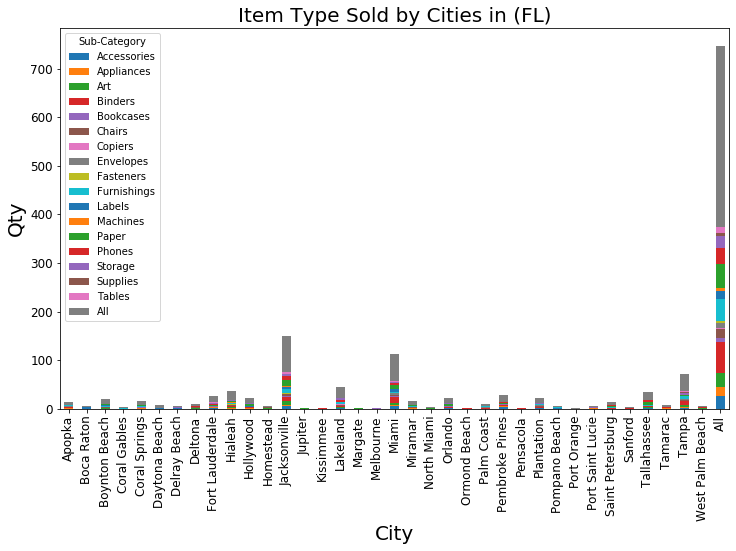

In [333]:
aq=pd.crosstab(index=[FL['City']], columns=FL['Sub-Category'], margins=True).\
plot.bar(stacked=True,figsize=(12,7),fontsize=12)


aq.set_xlabel('City',fontsize=20)
# a_.grid()
aq.set_ylabel("Qty",fontsize=20)
aq.set_title('Item Type Sold by Cities in (FL)',fontsize=20) 

# `Pivot Tables:`

In [245]:
# mean sales by state and city:

state_city_Sales=sales_dta.loc[:,['State','City','Sales']]


pd.pivot_table(state_city_Sales,
index=['State', 'City'], values='Sales', aggfunc='mean')

Sales
State     City                   
Alabama   Auburn       294.471667
          Decatur      259.601538
          Florence     399.470000
          Hoover       131.462500
          Huntsville   248.437000
...                           ...
Wisconsin Superior     144.414444
          Waukesha      54.500000
          Wausau        79.370000
          West Allis   125.240000
Wyoming   Cheyenne    1603.136000

[600 rows x 1 columns]

In [344]:

FL=sales_dta[sales_dta['State']=='Florida']
FL.loc[:,['City','Sales','Sub-Category']]



,City,Sales,Sub-Category
3,Fort Lauderdale,957.5775,Tables
4,Fort Lauderdale,22.3680,Storage
43,Melbourne,95.6160,Storage
231,Tampa,233.8600,Tables
232,Tampa,620.6145,Tables
...,...,...,...
9567,Tampa,4.0320,Art
9585,Miami,31.0080,Paper
9769,Hialeah,339.9200,Bookcases
9770,Hialeah,10.5280,Paper


In [338]:
pd.pivot_table(FL,
index=['City', 'Sub-Category'], values='Sales', aggfunc='mean')


Sales
City            Sub-Category           
Apopka          Appliances    671.54400
                Binders        13.28600
                Envelopes      48.94400
                Fasteners      14.32000
                Furnishings   129.88800
...                                 ...
Tampa           Supplies       41.37600
                Tables        427.23725
West Palm Beach Art            13.12000
                Paper          72.22400
                Phones         55.98400

[185 rows x 1 columns]

Text(0.5, 1.0, 'Item Type Sold by Cities in (FL)')

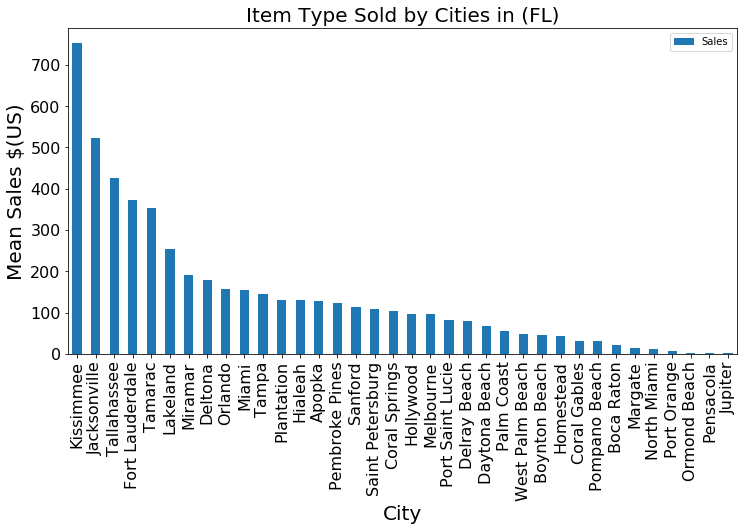

In [364]:
aq_=pd.pivot_table(FL,
index=['City'], values='Sales', aggfunc='mean').sort_values('Sales',ascending=False).\
plot(kind='bar',figsize=(12,6),fontsize=16,rot=90)

aq_.set_xlabel('City',fontsize=20)

aq_.set_ylabel("Mean Sales $(US)",fontsize=20)
aq_.set_title('Item Type Sold by Cities in (FL)',fontsize=20) 

# <font color=red>Like</font>, Share & 

# <font color=red>SUB</font>scribe

**`Help Support the channel: Buy Me A Coffee @mrfugudatasci`**

# `Citations & Help:`

# ◔̯◔

https://stackoverflow.com/questions/38174155/group-dataframe-and-get-sum-and-count

https://www.datacamp.com/community/tutorials/pandas-multi-index

https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index

https://medium.com/@yangdustin5/quick-guide-to-pandas-pivot-table-crosstab-40798b33e367

https://datagy.io/pandas-crosstab/

https://www.digitalocean.com/community/tutorials/data-analysis-and-visualization-with-pandas-and-jupyter-notebook-in-python-3